In [4]:
import os
import torch

# Setting up the environment to use only GPU 2
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "2"

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Check number of GPUs
print(f"Number of GPUs: {torch.cuda.device_count()}")

# Check GPU name
print(f"GPU name: {torch.cuda.get_device_name()}")

# Check PyTorch version
print(f"PyTorch version: {torch.__version__}")

Using device: cuda
Number of GPUs: 1
GPU name: NVIDIA A100-SXM4-40GB
PyTorch version: 2.5.1+cu121


In [2]:
!nvidia-smi

Tue Dec  3 19:33:04 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.154.05             Driver Version: 535.154.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB          On  | 00000000:07:00.0 Off |                    0 |
| N/A   34C    P0              96W / 400W |  11888MiB / 40960MiB |    100%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

In [5]:
from PIL import Image
import os

# Define the directory containing the images
image_directory = "/data/students/mary/mlops-exercises/ME6/dataset__all/train/images"

# Initialize counters
landscape_count = 0
portrait_count = 0

# Iterate through each image file in the directory
for filename in os.listdir(image_directory):
    if filename.startswith("09") and filename.endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif')):
        # Open the image
        image_path = os.path.join(image_directory, filename)
        with Image.open(image_path) as img:
            width, height = img.size
            
            # Determine if the image is landscape or portrait
            if width > height:
                landscape_count += 1
                print(f"{filename} is a landscape image")
            elif width < height:
                portrait_count += 1

# Print the results
print(f"Number of landscape images: {landscape_count}")
print(f"Number of portrait images: {portrait_count}")

090059.jpg is a landscape image
090063.jpg is a landscape image
090018.jpg is a landscape image
090060.jpg is a landscape image
090062.jpg is a landscape image
090061.jpg is a landscape image
Number of landscape images: 6
Number of portrait images: 425


In [6]:
import os
import cv2
import matplotlib.pyplot as plt
from pycocotools.coco import COCO
import numpy as np

# Define the path to the images and annotations directories
images_dir = "/data/students/mary/mlops-exercises/ME6/dataset__all/train/images"
annotations_path = "/data/students/mary/mlops-exercises/ME6/dataset__v3/adj_instances_train.json"

# Load the COCO annotations
coco = COCO(annotations_path)

# Function to visualize annotations
def visualize_annotations(image_id):
    # Load the image information
    img_info = coco.loadImgs(image_id)[0]
    image_path = os.path.join(images_dir, img_info['file_name'])
    
    # Load the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Get the annotations for the image
    ann_ids = coco.getAnnIds(imgIds=image_id)
    anns = coco.loadAnns(ann_ids)
    
    # Plot the image
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    
    # Draw the bounding boxes and segmentation masks
    for ann in anns:
        class_id = ann['category_id']
        bbox = ann['bbox']
        segmentation = ann.get('segmentation', [])
        
        # Draw bounding box
        x_min, y_min, width, height = bbox
        rect = plt.Rectangle((x_min, y_min), width, height, fill=False, edgecolor='red', linewidth=2)
        plt.gca().add_patch(rect)
        plt.text(x_min, y_min, str(class_id), color='red', fontsize=12)
        
        # Draw segmentation mask if available
        if segmentation:
            for seg in segmentation:
                poly = np.array(seg).reshape((len(seg) // 2, 2))
                polygon = plt.Polygon(poly, fill=True, edgecolor='blue', alpha=0.4)
                plt.gca().add_patch(polygon)
    
    plt.axis('off')
    plt.show()

loading annotations into memory...
Done (t=0.15s)
creating index...
index created!


Visualizing annotations for 090351.jpg


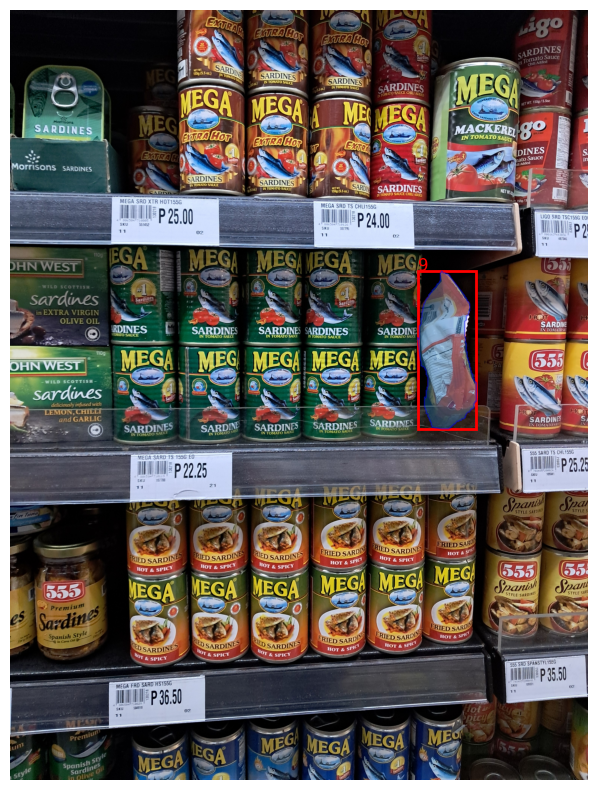

Visualizing annotations for 090352.jpg


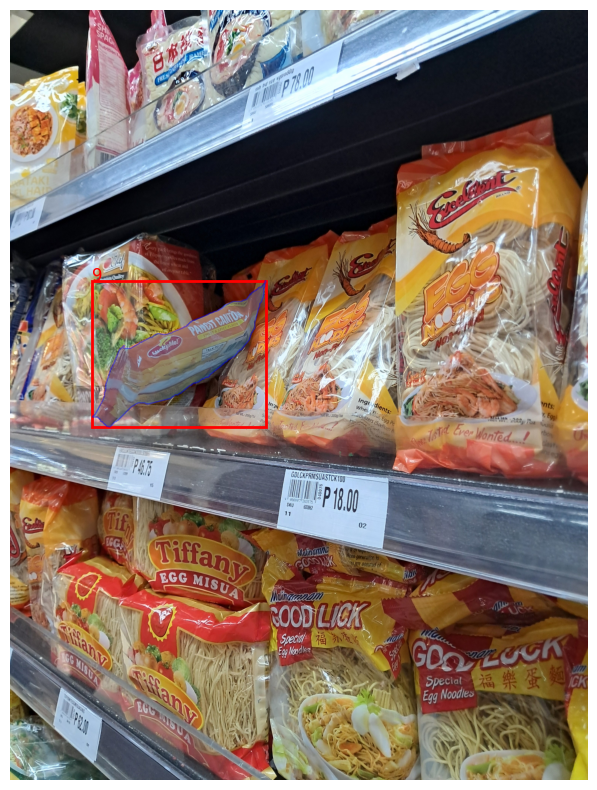

Visualizing annotations for 090382.jpg


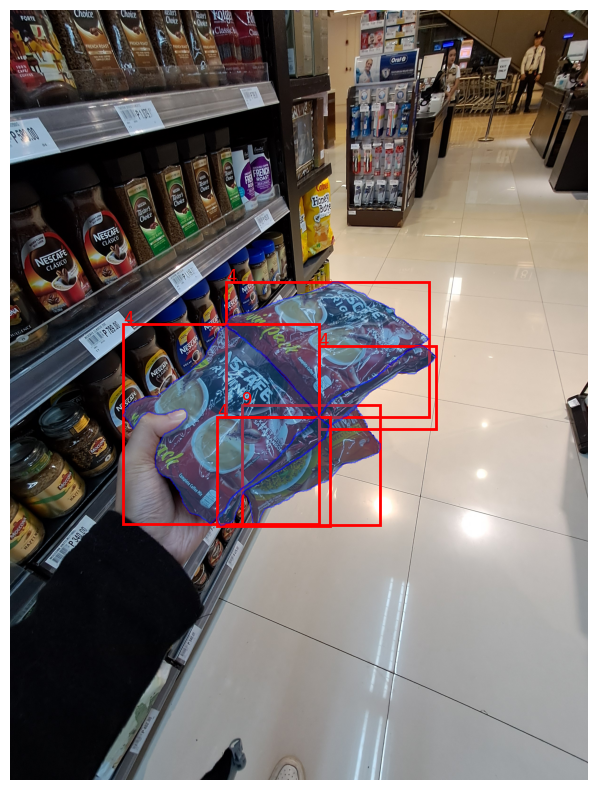

Visualizing annotations for 250001.jpg


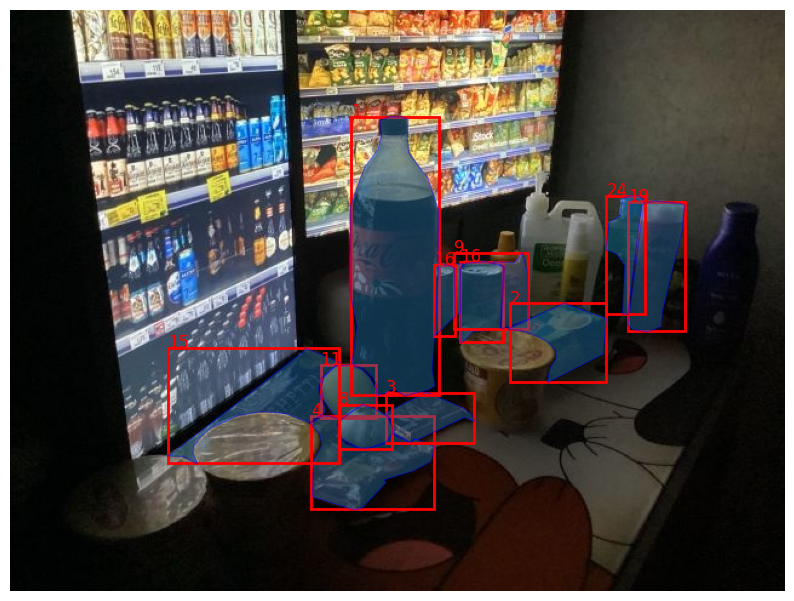

In [7]:
# List of corrupted files to visualize
corrupted_files = [
    "090351.jpg",
    "090352.jpg",
    "090382.jpg", 
    "250001.jpg"
]


# Visualize the annotations of the corrupted files
for filename in corrupted_files:
    # Get all image IDs
    img_ids = coco.getImgIds()
    # Find the image ID that matches the filename
    img_id = None
    for id in img_ids:
        img_info = coco.loadImgs(id)[0]
        if img_info['file_name'] == filename:
            img_id = id
            break
    
    if img_id:
        print(f"Visualizing annotations for {filename}")
        visualize_annotations(img_id)
    else:
        print(f"File {filename} does not exist in the annotations.")